In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv('dataforex.csv')
print(df.shape)
df.head(7)

(6, 3)


,title,abstract,class
0,Concerns about inflation,if rising,down
1,Economic growth,if better,up
2,The Federal Reserve's interest rate announcement,if it increases,down
3,"Other factors such as terrorism, the COVID-19 ...",if any,up
4,Federal Reserve's monetary policy,if good.,down
5,"Political situation, Ukrainian-Russian war",war,down


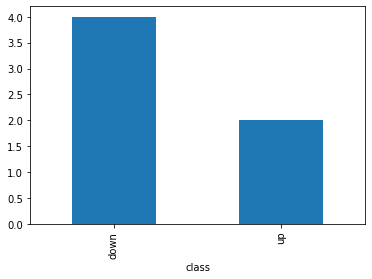

0.6666666666666666


In [186]:
df.groupby('class').abstract.count().plot.bar(ylim=0)
plt.show()
print(4/6) #Baseline accuracy

In [187]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatbest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [188]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

df['processedtext'] = df['abstract'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [189]:
print(df.shape)
df.head(10)

(6, 4)


,title,abstract,class,processedtext
0,Concerns about inflation,if rising,down,rise
1,Economic growth,if better,up,better
2,The Federal Reserve's interest rate announcement,if it increases,down,increas
3,"Other factors such as terrorism, the COVID-19 ...",if any,up,
4,Federal Reserve's monetary policy,if good.,down,good
5,"Political situation, Ukrainian-Russian war",war,down,war


In [190]:
from sklearn.model_selection import train_test_split

target = df['class']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.30, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(6, 4)
(4,)
(2,)


In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['good', 'rise', 'war']


In [192]:
print(train_tfIdf.shape); print(test_tfIdf.shape)

(4, 3)
(2, 3)


In [193]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

['down' 'down']


In [194]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2, labels=['up', 'down'])
print(Conf_metrics_tfidf)

0.5
[[0 1]
 [0 1]]


In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)

classifier.fit(train_tfIdf, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=100)

In [196]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF, labels=['up', 'down'])
print(Conf_metrics_RF)

['up' 'up']
0.5
[[1 0]
 [1 0]]
